# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [ ]:
Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [ ]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
tf.__version__

'2.12.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

In [ ]:
X_train[0].shape

(28, 28)

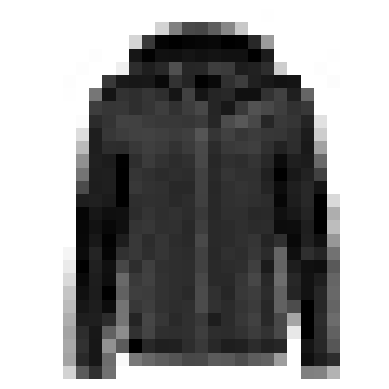

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

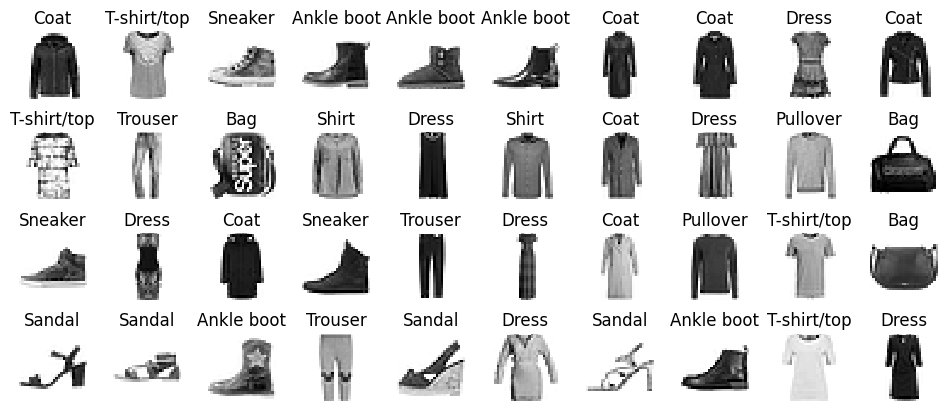

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[ 0.01486787, -0.0712854 , -0.06351131, ..., -0.01834064,
        -0.06689097,  0.03215543],
       [-0.04727399,  0.03565328, -0.01996727, ...,  0.06132784,
         0.06033534, -0.0480144 ],
       [ 0.02812707, -0.05455149, -0.04405416, ...,  0.06328627,
         0.02381478, -0.06140114],
       ...,
       [-0.01741185,  0.03301337,  0.04922004, ..., -0.05370926,
         0.00095013, -0.03427722],
       [ 0.07392322,  0.03740259,  0.00861826, ..., -0.06784229,
        -0.04851945,  0.06406665],
       [ 0.01941917,  0.05441014,  0.06430565, ...,  0.06777999,
         0.00560696, -0.00415332]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 5ms/step - loss: 0.7244 - accuracy: 0.7621 - val_loss: 0.5227 - val_accuracy: 0.8222
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4894 - accuracy: 0.8292 - val_loss: 0.4473 - val_accuracy: 0.8430
Epoch 3/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4456 - accuracy: 0.8444 - val_loss: 0.4814 - val_accuracy: 0.8298
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4193 - accuracy: 0.8532 - val_loss: 0.3938 - val_accuracy: 0.8592
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3987 - accuracy: 0.8604 - val_loss: 0.3938 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3843 - accuracy: 0.8643 - val_loss: 0.3847 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3700 - accuracy: 0.8701 - val_loss: 0.3736 - val_acc

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history

{'loss': [0.7244377136230469,
  0.48937708139419556,
  0.4455723762512207,
  0.41928592324256897,
  0.3986966609954834,
  0.38434115052223206,
  0.3700471818447113,
  0.3595983386039734,
  0.34714871644973755,
  0.3380689322948456,
  0.3290085792541504,
  0.3208494186401367,
  0.31351813673973083,
  0.3069054186344147,
  0.3002903461456299,
  0.2934763431549072,
  0.2872414290904999,
  0.28109580278396606,
  0.2755682170391083,
  0.27213287353515625,
  0.2653062045574188,
  0.261529803276062,
  0.2558024227619171,
  0.25185704231262207,
  0.24659007787704468,
  0.24286207556724548,
  0.23842976987361908,
  0.23439180850982666,
  0.2308645099401474,
  0.22645750641822815],
 'accuracy': [0.762145459651947,
  0.8292363882064819,
  0.8444363474845886,
  0.8532363772392273,
  0.8604000210762024,
  0.8643090724945068,
  0.870090901851654,
  0.8730363845825195,
  0.8762000203132629,
  0.8796181678771973,
  0.8828908801078796,
  0.8854363560676575,
  0.8879272937774658,
  0.890781819820404,
  

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

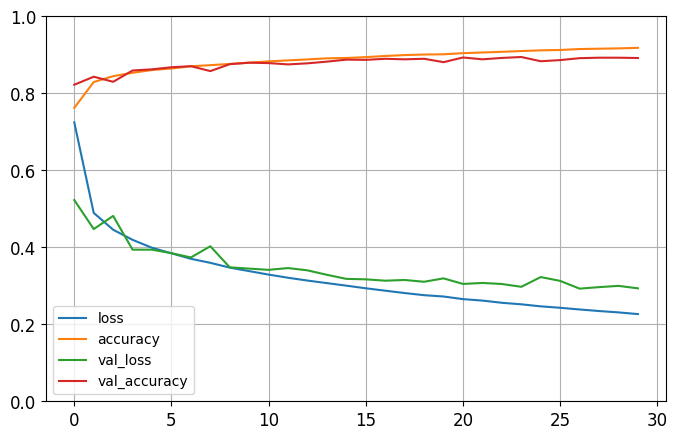

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3279 - accuracy: 0.8820


[0.3279184401035309, 0.8820000290870667]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 102ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = model.predict_classes(X_new)
y_pred

In [ ]:
np.array(class_names)[y_pred]

In [ ]:
y_new = y_test[:3]
y_new

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

In [ ]:
def plot_learning_curves(history):
    # Extract the training and validation loss values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Extract the training and validation accuracy values
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    # Create the plot
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, label='Training Accuracy')
    plt.plot(epochs, val_acc, label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

### Plot Learning curves when using different optimizers

In [ ]:
sgd = keras.optimizers.SGD(lr=0.01, momentum=0.9)
adam = keras.optimizers.Adam(lr=0.001)
rmsprop = keras.optimizers.RMSprop(lr=0.001)

optimizers = {'SGD': sgd, 'Adam': adam, 'RMSprop': rmsprop}

Epoch 1/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5226 - accuracy: 0.8125 - val_loss: 0.4432 - val_accuracy: 0.8462
Epoch 2/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3852 - accuracy: 0.8590 - val_loss: 0.3582 - val_accuracy: 0.8686
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3479 - accuracy: 0.8717 - val_loss: 0.3394 - val_accuracy: 0.8738
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3210 - accuracy: 0.8823 - val_loss: 0.3622 - val_accuracy: 0.8592
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3040 - accuracy: 0.8875 - val_loss: 0.3031 - val_accuracy: 0.8876
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2870 - accuracy: 0.8931 - val_loss: 0.3196 - val_accuracy: 0.8810
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2756 - accuracy: 0.8967 - val_loss: 0.3085 - val_acc

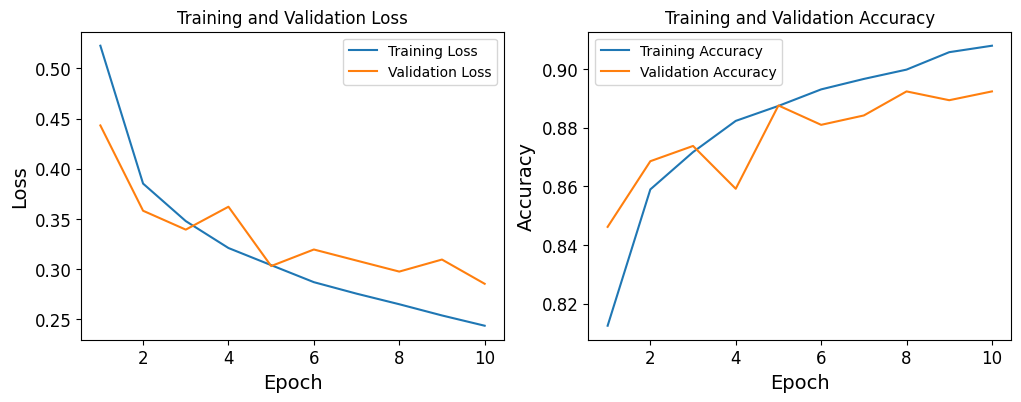

Epoch 1/10
1719/1719 [==============================] - 14s 7ms/step - loss: 0.4883 - accuracy: 0.8242 - val_loss: 0.3820 - val_accuracy: 0.8586
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3644 - accuracy: 0.8655 - val_loss: 0.3384 - val_accuracy: 0.8792
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3296 - accuracy: 0.8796 - val_loss: 0.3203 - val_accuracy: 0.8830
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3048 - accuracy: 0.8872 - val_loss: 0.3356 - val_accuracy: 0.8830
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2859 - accuracy: 0.8929 - val_loss: 0.3091 - val_accuracy: 0.8848
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.2720 - accuracy: 0.8976 - val_loss: 0.3279 - val_accuracy: 0.8836
Epoch 7/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.2588 - accuracy: 0.9023 - val_loss: 0.3004 - val_ac

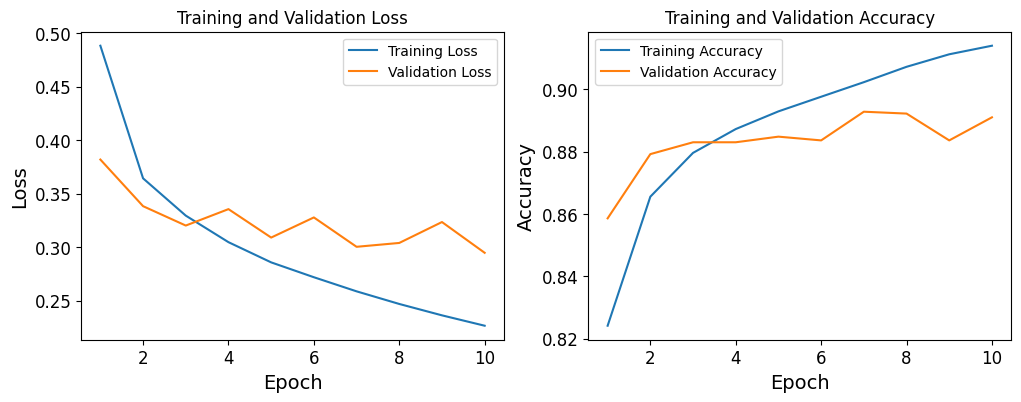

Epoch 1/10
1719/1719 [==============================] - 15s 8ms/step - loss: 0.5015 - accuracy: 0.8178 - val_loss: 0.3933 - val_accuracy: 0.8586
Epoch 2/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.3822 - accuracy: 0.8605 - val_loss: 0.3788 - val_accuracy: 0.8674
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3572 - accuracy: 0.8724 - val_loss: 0.3840 - val_accuracy: 0.8694
Epoch 4/10
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3460 - accuracy: 0.8779 - val_loss: 0.3632 - val_accuracy: 0.8778
Epoch 5/10
1719/1719 [==============================] - 22s 13ms/step - loss: 0.3358 - accuracy: 0.8815 - val_loss: 0.3808 - val_accuracy: 0.8822
Epoch 6/10
1719/1719 [==============================] - 17s 10ms/step - loss: 0.3277 - accuracy: 0.8856 - val_loss: 0.3943 - val_accuracy: 0.8740
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3203 - accuracy: 0.8888 - val_loss: 0.4926 - val_

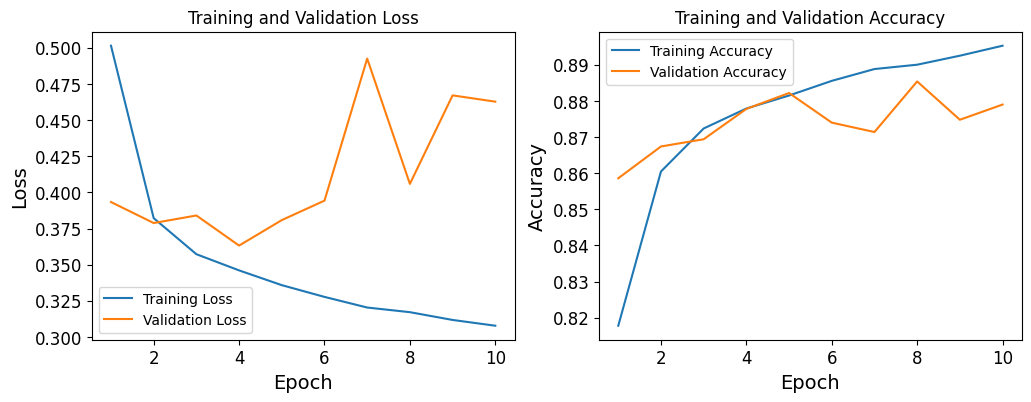

In [ ]:
for opt_name, opt_val in optimizers.items():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(300, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer=opt_val,
              metrics=["accuracy"])
    
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
    plot_learning_curves(history)

### Plot Learning curves when using different batch size

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7324 - accuracy: 0.7561 - val_loss: 0.5312 - val_accuracy: 0.8242
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4904 - accuracy: 0.8285 - val_loss: 0.4448 - val_accuracy: 0.8476
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4431 - accuracy: 0.8439 - val_loss: 0.4051 - val_accuracy: 0.8632
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4142 - accuracy: 0.8546 - val_loss: 0.3874 - val_accuracy: 0.8662
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3939 - accuracy: 0.8615 - val_loss: 0.4032 - val_accuracy: 0.8600
Epoch 6/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3785 - accuracy: 0.8649 - val_loss: 0.3735 - val_accuracy: 0.8674
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3643 - accuracy: 0.8705 - val_loss: 0.3623 - val_accura

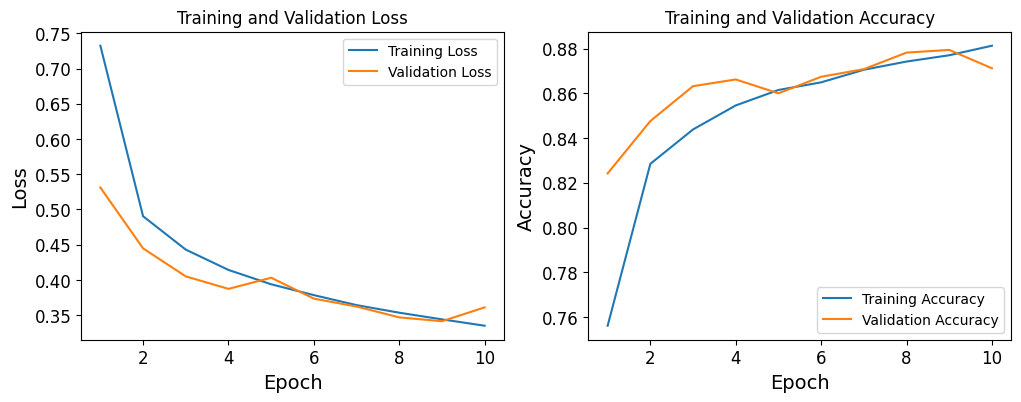

Epoch 1/10
860/860 [==============================] - 7s 8ms/step - loss: 0.8763 - accuracy: 0.7213 - val_loss: 0.6066 - val_accuracy: 0.8068
Epoch 2/10
860/860 [==============================] - 5s 6ms/step - loss: 0.5562 - accuracy: 0.8130 - val_loss: 0.5442 - val_accuracy: 0.8042
Epoch 3/10
860/860 [==============================] - 6s 7ms/step - loss: 0.4963 - accuracy: 0.8287 - val_loss: 0.4643 - val_accuracy: 0.8464
Epoch 4/10
860/860 [==============================] - 5s 6ms/step - loss: 0.4648 - accuracy: 0.8383 - val_loss: 0.4946 - val_accuracy: 0.8206
Epoch 5/10
860/860 [==============================] - 5s 6ms/step - loss: 0.4435 - accuracy: 0.8460 - val_loss: 0.4520 - val_accuracy: 0.8402
Epoch 6/10
860/860 [==============================] - 6s 8ms/step - loss: 0.4276 - accuracy: 0.8518 - val_loss: 0.4419 - val_accuracy: 0.8372
Epoch 7/10
860/860 [==============================] - 5s 6ms/step - loss: 0.4137 - accuracy: 0.8567 - val_loss: 0.4211 - val_accuracy: 0.8552
Epoch 

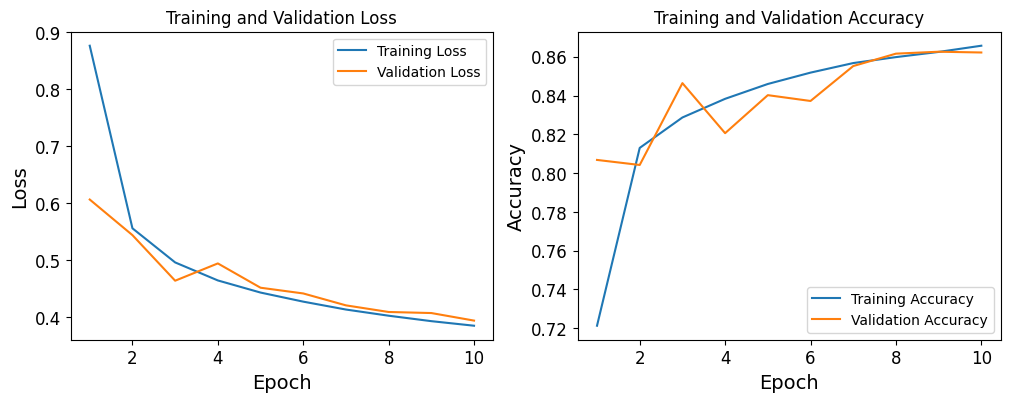

Epoch 1/10
430/430 [==============================] - 4s 8ms/step - loss: 1.0527 - accuracy: 0.6742 - val_loss: 0.6924 - val_accuracy: 0.7754
Epoch 2/10
430/430 [==============================] - 3s 8ms/step - loss: 0.6386 - accuracy: 0.7910 - val_loss: 0.5782 - val_accuracy: 0.8082
Epoch 3/10
430/430 [==============================] - 5s 11ms/step - loss: 0.5580 - accuracy: 0.8128 - val_loss: 0.5202 - val_accuracy: 0.8298
Epoch 4/10
430/430 [==============================] - 3s 8ms/step - loss: 0.5177 - accuracy: 0.8251 - val_loss: 0.4895 - val_accuracy: 0.8354
Epoch 5/10
430/430 [==============================] - 4s 8ms/step - loss: 0.4933 - accuracy: 0.8313 - val_loss: 0.4783 - val_accuracy: 0.8376
Epoch 6/10
430/430 [==============================] - 4s 9ms/step - loss: 0.4737 - accuracy: 0.8371 - val_loss: 0.4607 - val_accuracy: 0.8426
Epoch 7/10
430/430 [==============================] - 4s 9ms/step - loss: 0.4591 - accuracy: 0.8408 - val_loss: 0.4436 - val_accuracy: 0.8520
Epoch

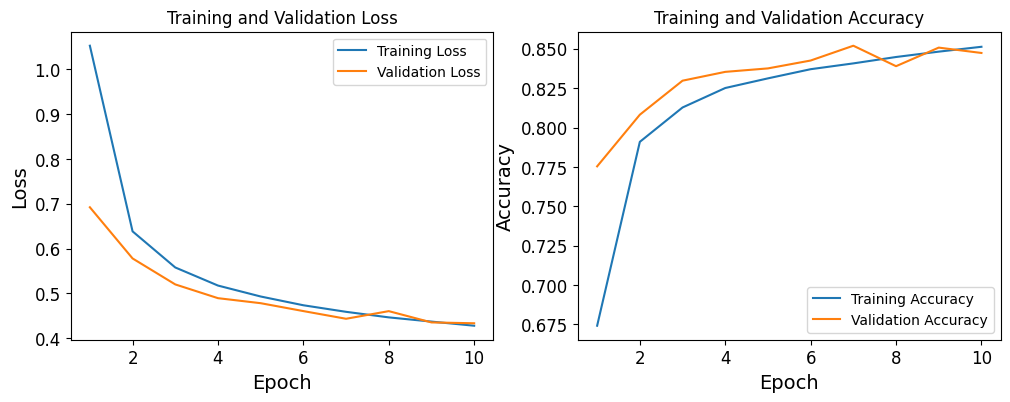

In [ ]:
batch_sizes = [32, 64, 128]

for batch_size in batch_sizes:
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=[28, 28]))
    model.add(keras.layers.Dense(300, activation="relu"))
    model.add(keras.layers.Dense(100, activation="relu"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
    
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, validation_data=(X_valid, y_valid))
    print("batch_size:",batch_size)
    plot_learning_curves(history)

###  Add additional neurons and use Dropout Layer. Plot Learning curves

In [ ]:
from keras.layers import  Dropout

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(Dropout(0.5))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
    
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
430/430 [==============================] - 8s 16ms/step - loss: 0.5872 - accuracy: 0.7883 - val_loss: 0.4285 - val_accuracy: 0.8428
Epoch 2/30
430/430 [==============================] - 7s 17ms/step - loss: 0.4408 - accuracy: 0.8375 - val_loss: 0.3637 - val_accuracy: 0.8708
Epoch 3/30
430/430 [==============================] - 8s 18ms/step - loss: 0.4050 - accuracy: 0.8526 - val_loss: 0.3383 - val_accuracy: 0.8806
Epoch 4/30
430/430 [==============================] - 7s 16ms/step - loss: 0.3830 - accuracy: 0.8605 - val_loss: 0.3511 - val_accuracy: 0.8696
Epoch 5/30
430/430 [==============================] - 9s 20ms/step - loss: 0.3677 - accuracy: 0.8645 - val_loss: 0.3208 - val_accuracy: 0.8830
Epoch 6/30
430/430 [==============================] - 7s 16ms/step - loss: 0.3546 - accuracy: 0.8684 - val_loss: 0.3292 - val_accuracy: 0.8840
Epoch 7/30
430/430 [==============================] - 7s 17ms/step - loss: 0.3435 - accuracy: 0.8723 - val_loss: 0.3193 - val_accuracy: 0.8856

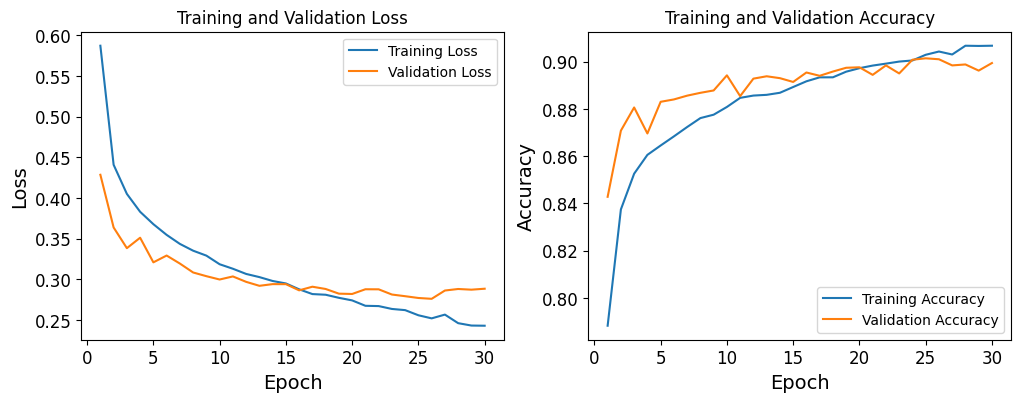

In [ ]:
plot_learning_curves(history)

### Batch normalization

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(10, activation="softmax"))



In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
    
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
430/430 [==============================] - 9s 19ms/step - loss: 0.5323 - accuracy: 0.8092 - val_loss: 0.4379 - val_accuracy: 0.8436
Epoch 2/30
430/430 [==============================] - 8s 18ms/step - loss: 0.4284 - accuracy: 0.8442 - val_loss: 0.3955 - val_accuracy: 0.8558
Epoch 3/30
430/430 [==============================] - 8s 18ms/step - loss: 0.4019 - accuracy: 0.8525 - val_loss: 0.3565 - val_accuracy: 0.8692
Epoch 4/30
430/430 [==============================] - 7s 17ms/step - loss: 0.3892 - accuracy: 0.8579 - val_loss: 0.3430 - val_accuracy: 0.8674
Epoch 5/30
430/430 [==============================] - 7s 16ms/step - loss: 0.3705 - accuracy: 0.8630 - val_loss: 0.3891 - val_accuracy: 0.8532
Epoch 6/30
430/430 [==============================] - 8s 18ms/step - loss: 0.3656 - accuracy: 0.8651 - val_loss: 0.3757 - val_accuracy: 0.8614
Epoch 7/30
430/430 [==============================] - 7s 15ms/step - loss: 0.3538 - accuracy: 0.8699 - val_loss: 0.3380 - val_accuracy: 0.8752

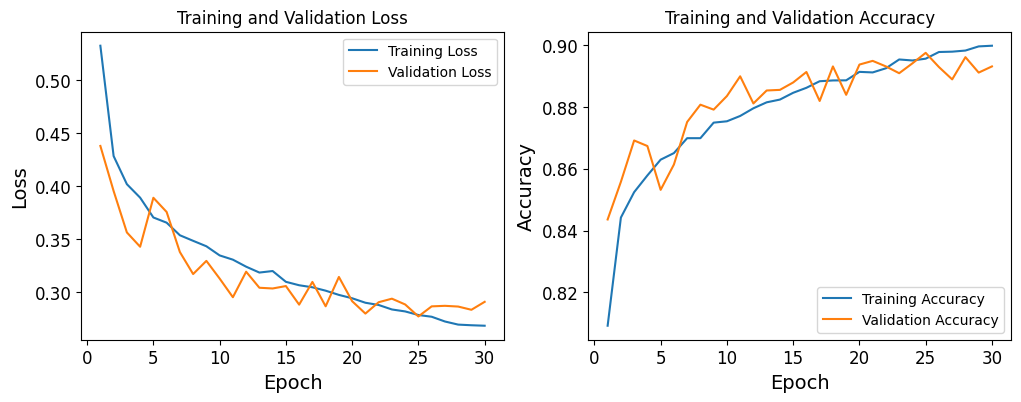

In [ ]:
plot_learning_curves(history)